# Cinemática vectorial

[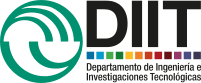](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)

---

## Posición en marco de referencia cartesiano
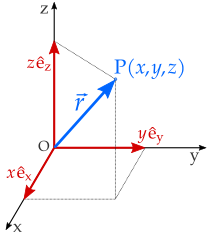

$$
\vec{r} = r \vec{r} = x \hat{e}_x +  y \hat{e}_y + z \hat{e}_z = (x,y,z),
$$
donde $\mathbf{e}$ es el nombre que se dió a un marco de referencia. 

## Vector posición
$$
\vec{r} = r \hat{r}
$$
- **Módulo** $ r = |\vec{r}| \geq 0 $
- **Dirección** el versor $\hat{r} $ en un espacio 3D  se descompone en 3 de un marco de referencia $\mathbf{e}: \hat{e}_i, \hat{e}_j, \hat{e}_k$
    - Si el marco es cartesiano estos son $\hat{e}_x, \hat{e}_y, \hat{e}_z$

## Operaciones simbólicas en Python
- [Python](https://www.python.org/): lenguaje de programación
    - interpretado: no compila antes de ejecutar linea por linea
    - interactivo: cada linea ejecutada devuelve una respuesta
    - orientado a objetos: largo de explicar... lo hablamos luego
- [Sympy](https://www.sympy.org/es/index.html): es una biblioteca de Python para matemática simbólica
    - Módulo [Physics: Classical Mechanics](https://docs.sympy.org/latest/modules/physics/mechanics/index.html) para la mecánica

### Bibliotecas de Python
Hay varias opciones para _importar_ bibliotecas
- `import` para su conjunto de funciones
- `from` para seleccionar un sub-conjunto

In [8]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de SymPy utilizaremos funciones de mecánica y les asignamos el apodo "mech" para escribir menos luego

En Jupyter, este sistema que presenta información en bloques, este es uno de código.  
Para que el resultado de su ejecución pueda usarse hay que _ejecutarlo_ (o _correrlo_).  
Para hacer esto se puede
- hacer clic en el ícono de reproducción (_play_) a la izquierda
- seleccionar la celda, dejar presionada la tecla de control (_Ctrl_) o la de mayúsculas (_shift_) y presionar la de retorno (_Return_) o la de ingreso (_Enter_)

### Suma de vectores

Si establecemos un marco de referencia
- Los $\hat{e}_i, \hat{e}_j, \hat{e}_k$ que utilizaremos son los del **sistema cartesiano**: $\hat{e}_x, \hat{e}_y, \hat{e}_z$.  
    - Son lo que usa por defecto `mechanics`.

In [9]:
E = mech.ReferenceFrame('e') # sistema de referencia cartesiano fijo al suelo

Creamos un vector

In [10]:
a_x, a_y, a_z = sym.symbols('a_x, a_y, a_z') # hay que declarar que símbolos se utilizarán
a= a_x* E.x+ a_y* E.y+ a_z* E.z
a

a_x*e.x + a_y*e.y + a_z*e.z

luego otro vector distinto

In [11]:
b_x, b_y, b_z = sym.symbols('b_x, b_y, b_z')
b= b_x* E.x+ b_y* E.y+ b_z* E.z
b

b_x*e.x + b_y*e.y + b_z*e.z

y al sumamorlos automáticamente se agrupan las componentes por su respectivo versor en ese marco.

In [12]:
c = a + b
c

(a_x + b_x)*e.x + (a_y + b_y)*e.y + (a_z + b_z)*e.z

### Dando valores a las variables
Tenemos la suma simbólica, pero si tengo los valores de las componentes me interesa obtener un resultado numérico.

Para ello armamos un **diccionario** que indique cuanto vale cada variable.

In [13]:
valores={a_x: 3, a_y: 0, a_z: 5,
         b_x: -5, b_y: -5, b_z: 7,
        } # son longitudes así que en el SI son [m] salvo otra indicación
c.subs(valores) # esto substituye variables en vector c

- 2*e.x - 5*e.y + 12*e.z

### Múltiplicar por un escalar
Si al vector $\vec{a}$ se lo multiplica por un escalar, e.g. $m$, se aplica este a cada componente.

In [14]:
m = sym.Symbol('m') # un escalar
m* a

a_x*m*e.x + a_y*m*e.y + a_z*m*e.z

### Producto escalar entre vectores
$\vec{a} \cdot \vec{b} = a b \cos(\theta) = a_x b_x+ a_y b_y + a_z b_z $

In [15]:
a.dot(b) # dot: punto, se referiere al producto punto o escalar

a_x*b_x + a_y*b_y + a_z*b_z

#### Módulo de un vector
Se puede definir a partir del producto escalar de un vector con si mismo 
$a = |\vec{a}| = \sqrt{\vec{a} \cdot \vec{a}} = \sqrt{a_x^2 + a_y^2 + a_z^2 }$

In [16]:
aProductoA = a.dot(a) # se guarda el resultado de la operación en una variable
aProductoA # imprime en pantalla el contenido de la variable

a_x**2 + a_y**2 + a_z**2

In [17]:
sym.sqrt(aProductoA ) # sqrt: square root (raiz cuadrada)

sqrt(a_x**2 + a_y**2 + a_z**2)

### Producto vectorial entre vectores
$$
\vec{r} \times \vec{s} = 
\begin{vmatrix}
  \hat{i} & \hat{j} & \hat{k} \\
  r_i & r_j & r_k\\
  s_i & s_j & s_k
\end{vmatrix}
= (r_j s_k - r_k s_j) \hat{i} + (r_k s_i - r_i s_k) \hat{j} + (r_i s_j - r_j s_i) \hat{k} .
$$

Por tanto para los $\vec{a}$ y $\vec{b}$ en el marco $\mathbf{e}$ con coordenadas cartesianas que definimos antes
$$
\vec{a} \times \vec{b} = 
(a_y b_z - a_z b_y) \hat{e}_x + (a_z b_x - a_x b_z) \hat{e}_y + (a_x b_y - a_y b_x) \hat{e}_z ,
$$
pero esto es más rápido y cómodo que lo calcule la computadora

In [18]:
a.cross(b)

(a_y*b_z - a_z*b_y)*e.x + (-a_x*b_z + a_z*b_x)*e.y + (a_x*b_y - a_y*b_x)*e.z

## Volvamos a la física | Velocidad
$$
\vec{v}= 
\dot{\vec{r}}= \frac{d \vec{r}}{d t} =
\frac{d}{d t}\left( r \hat{r}\right) =
\frac{d r_1}{d t} \hat{e}_1 + r_1 \frac{d \hat{e}_1}{d t} +  
\frac{d r_2}{d t} \hat{e}_2 + r_2 \frac{d \hat{e}_2}{d t} +  
\frac{d r_3}{d t} \hat{e}_3 + r_3 \frac{d \hat{e}_3}{d t}  
$$
Tendríamos seis términos según la regla de la cadena.

En un marco de referencia cartesiano $\hat{e}_x, \hat{e}_y, \hat{e}_z$ apuntan siempre en la misma dirección.
Por tanto la derivada de los versores en $t$ es nula y la expresión anterior se reduce a 
$$
\vec{v}= \dot{\vec{r}} = 
\frac{d x}{d t} \hat{e}_x +
\frac{d y}{d t} \hat{e}_y +
\frac{d z}{d t} \hat{e}_z =
\dot{x} \hat{e}_x +
\dot{y} \hat{e}_y +
\dot{z} \hat{e}_z
$$

Escribir cada símbolo que se derivará como función del tiempo puede ser tedioso.
Se puede usar una función del módulo `mechanics` para definir *símbolos dinámicos*.

In [19]:
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
x, y, z = mech.dynamicsymbols('x, y, z') # todos los símbolos que tienen dependencia con el tiempo
r = x* E.x+ y* E.y+ z* E.z
v = r.dt(E) # dt: deriva un vector respecto a t en el marco indicado
v

### La aceleración es solo repetir la operación

$$
\vec{a}= 
\dot{\vec{v}}= \frac{d \vec{v}}{d t} =
\ddot{r} =
\frac{d}{d t}\left( r \hat{r}\right) =
\frac{d \dot{x}}{d t} \hat{e}_x +
\frac{d \dot{y}}{d t} \hat{e}_y +
\frac{d \dot{z}}{d t} \hat{e}_z =
\ddot{x} \hat{e}_x +
\ddot{y} \hat{e}_y +
\ddot{z} \hat{e}_z
$$

In [20]:
a = v.dt(E)
a

## ¿Y si el marco de referencia no es cartesiano? ¿Y si este "se mueve"?

Para analizar estos casos juntamos ambas complicaciones en un problema que nos servirá de ejemplo.

### Enunciado: araña sobre un frisbee
Un frisbee tiene su masa $M$ distribuida en forma uniforme en su radio $R$.
Mientras gira manteniendo su horizontalidad una araña que estaba originalmente en su centro camina en dirección radial a velocidad constante $v_a$.  
1. Escribir la expresión velocidad y aceleración de la araña consideradas desde un sistema de coordenas fijas al suelo.

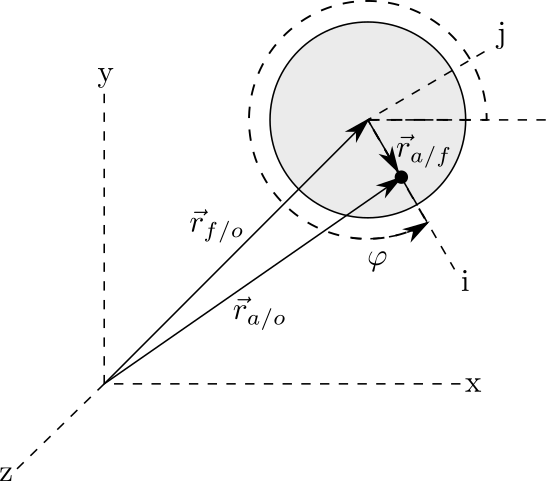

### Posición del frisbee
En la figura vemos el frisbee desde arriba que vuela siempre horizontal.
La posición de su centro de masa en el marco de referencia cartesiano fijo al **suelo** al que llamaremos $\mathbf{o}$ se describe por un par cartesiano $(x,y)$.

In [21]:
suelo = mech.ReferenceFrame('o') # sistema de referencia cartesiano fijo al suelo
x, y = mech.dynamicsymbols('x, y')
r_f_o = x* suelo.x + y* suelo.y # vector posición del frisbee
r_f_o

### Posición de la araña en el frisbee
- Al girar el frisbee cambia el ángulo del versor $\mathbf{\hat{f}_i}$ del marco de referencia **frisbee**.
- Este ángulo $\varphi$ se mide respecto a $\mathbf{\hat{o}_x}$ del marco de referencia **suelo**.
- Es decir, el marco de referencia **frisbee**, o $\mathbf{\hat{f}}$, tiene aplicada una rotación en el eje $\mathbf{\hat{o}_z}$ de $\varphi$.
- Como cualquier otro en un espacio tridimensional este marco de referencia consta de un triplete de versores: $\mathbf{\hat{f}_i}$, $\mathbf{\hat{f}_j}$ y $\mathbf{\hat{f}_k}$, este último paralelo a $\mathbf{\hat{o}_z}$.

In [22]:
phi = mech.dynamicsymbols('varphi')
frisbee = suelo.orientnew('f', 'Axis', (phi, suelo.z),
                         indices=('i','j','k')
                         ) # marco rotado en phi sobre el eje z del marco suelo con un triplete de versores llamados i,j,k

En este marco de referencia para saber la posición de la araña solo hace falta saber que que radio $\rho$ le aleja del origen de este marco de de referencia, 
$$
\vec{r}_{a/f} = \rho \hat{f}_i .
$$

In [23]:
rho = mech.dynamicsymbols('rho') # radio de la araña
r_a_f = rho* frisbee.x # en mechanics los tripletes siempre son x,y,z pero usará los nombres que le dimos con "indices"
r_a_f

### Posición de la araña en el marco de referencia suelo

Se ve en la figura que $\vec{r}_{a/o}$, la posición de la araña en este sistema, es la suma del vector posición del centro de masa del frisbee con otro vector que indica la posición de la araña respecto al mismo, $\vec{r}_{a/f}$, es decir
$$
\vec{r}_{a/o} = \vec{r}_{a/f}  +\vec{r}_{f/o}.
$$
Una forma de "ordenarse" al escribir suma de posiciones que dependen del marco de referencia es notar que el subindice "del medio", en este caso $f$ "desaparece" con la suma.

In [24]:
r_a_o = r_a_f + r_f_o
r_a_o

### Velocidad de la araña

Al derivar respecto al tiempo $\vec{r}_{a/o}$ no hay que olvidar de derivar todos los términos según corresponda siguiendo la regla de la cadena,
$$
\dot{\vec{r}}_{a/o}= \dot{\rho} \hat{f}_i + \rho \dot{\hat{f}}_i + \dot{x} \hat{o}_x + \dot{y} \hat{o}_y,
$$
donde como vimos no figura $\dot{\hat{o}}_x$ o $\dot{\hat{o}}_y$ pues los correspondientes versores estos son fijos.
En contraposición, como $\hat{f}_i$ no lo está hay que determinar que es $\dot{\hat{f}}_i$. 

#### Derivada de un versor en el tiempo
Para entender que pasa con la derivada en el tiempo de un versor, como $\dot{\hat{f}}_i$, se analiza con la regla de la cadena tal derivada de una posición
$$
\dot{\vec{r}} = \dot{r} \hat{r} + r \frac{\mathrm{d} \hat{r}}{\mathrm{d} t} ,
$$
en particular como es ese cambio del versor $\mathrm{d} \hat{r}$ que se produce en tal diferencia de tiempo $\mathrm{d} t$.

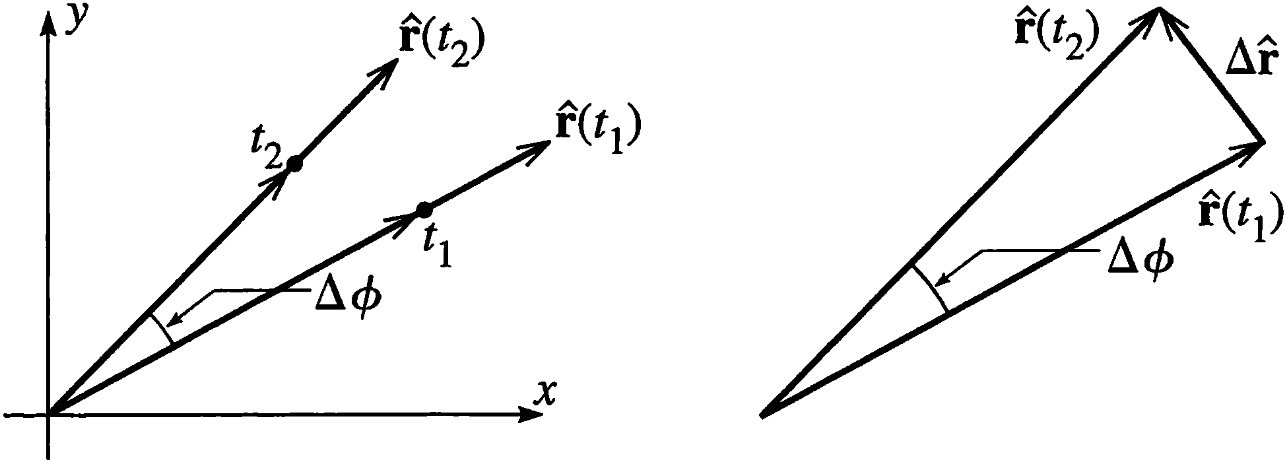

En la figura de la **izquierda** cuando transcurre un tiempo de $t_1$ al $t_2$:
- cambia el ángulo de la posición $\vec{r}$ en $\Delta \phi$
- los versores para estas posiciones no están en la misma recta y pasan de apuntar como $\hat{r}(t_1)$ a $\hat{r}(t_2)$.

En la figura de la **derecha** se mueven ambos versores $\hat{r}$ para tengan un origen común
- la diferencia de los versores es $\Delta \hat{r} = \hat{r}(t_2) - \hat{r}(t_1)$
- el ángulo de las rectas que los contienen siguen difiriendo en $\Delta \phi$
- los versores $\hat{r}$ tienen longitud unidad ($=1$), entonces el segmento $\Delta \hat{r}$ es aproximadamente al arco en una circunferencia de un radio $=1$ en un ángulo $\Delta \phi$ que apunta en la dirección en que $\phi$ _crece_ ($\hat{\phi}$) es decir
$$
\Delta \hat{r} \approx 1 \times \Delta \phi \hat{\phi} = \Delta \phi \hat{\phi}, 
$$
y como nos interesa que pasa cuando trascurre ese $\Delta t$, multiplicamos y dividimos por este, lo que no cambia el resultado pero nos permite entender que
$$
\Delta \hat{r} \approx \frac{\Delta \phi}{\Delta t} \Delta t \hat{\phi} = \dot{\phi} \Delta t \hat{\phi}. 
$$
Finalmente volvemos a lo que buscabamos determinar $\frac{\mathrm{d} \hat{r}}{\mathrm{d} t}$ que, por la definición de derivada es
$$
\frac{\mathrm{d} \hat{r}}{\mathrm{d} t} = 
\lim_{\Delta t \to 0} \frac{\Delta \hat{r}}{\Delta t} = 
\dot{\phi} \hat{\phi} ,
$$
lo que escribir completa la derivada de la posición
$$
\dot{\vec{r}} =
\dot{r} \hat{r} + r \frac{\mathrm{d} \hat{r}}{\mathrm{d} t} =
\dot{r} \hat{r} + r \dot{\phi} \hat{\phi} 
.
$$

#### Velocidad de la araña respecto al suelo
El resultado obtenido en la sección anterior se aplica a la araña en el marco de refefencia frisbee
$$
\dot{\rho} \hat{f}_i + \rho \dot{\hat{f}_i} 
= 
\dot{\rho} \hat{f}_i + \rho \dot{\varphi} \hat{f}_j, 
$$
siendo $\hat{f}_j$ la dirección transveral a la $\hat{f}_i$ en que se desplaza con una velocidad constante $\dot{\rho}$.

Falta tan solo agregar los términos de la velocidad del marco de referencia frisbee respecto al suelo,
$$
\boxed{
\dot{\vec{r}}_{a/o} = \dot{x} \hat{o}_x + \dot{y} \hat{o}_y + \dot{\rho} \hat{f}_i + \rho \dot{\varphi} \hat{f}_j
}.
$$

#### Cálculo de la velocidad con SymPy mechanics
Todo lo anterior puede hacerlo el módulo `mechanics` de `SymPy` con su función para la derivación de vectores en el tiempo `dt`. 

In [25]:
v_a_o = r_a_o.dt(suelo) # debe indicarse el marco de referencia respecto al que se deriva
v_a_o

Esto evidencia la capacidad de ahorro en tiempo y esfuerzo que permite el cálculo simbólico computacional.

### Aceleración de la araña

Aprovechamos nuevamente la misma función para derivar ahora la velocidad

In [26]:
a_a_o = v_a_o.dt(suelo)
a_a_o

Realizar cada cálculo que lleva a este resultado es tedioso.
Solo para el curioso a continuación se comenta como calcular $\dot{\hat{f}}_j$, pero como se dijo antes, pensar en esto no es ya parte de las ocupaciones del científico o ingeniero en este siglo en que se dispone de computación simbólica.

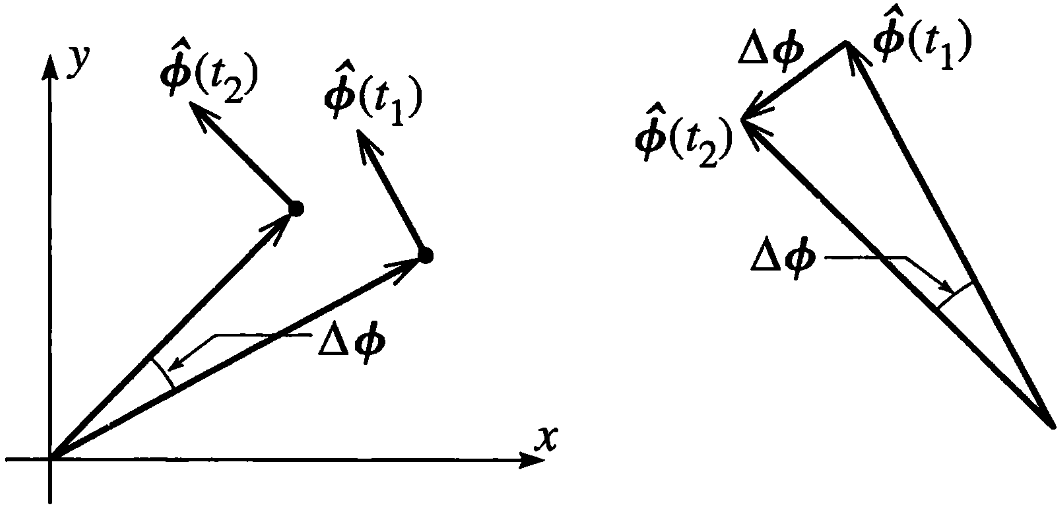

Siguiendo idéntico procedimiento que para $\dot{\hat{f}}_i$, se puede observar en esta figuras que 
$$
\frac{\mathrm{d} \hat{\phi}}{\mathrm{d} t} = \lim_{\Delta t \to 0} \frac{\Delta \hat{\phi}}{\Delta t} = \dot{\phi} (- \hat{r}) .
$$